<a href="https://colab.research.google.com/github/Srinivas-8612/Machine-Learning/blob/main/ML_LAB02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression
Accuracy: 0.777
Precision (macro): 0.709
Recall (macro): 0.631
F1-score (macro): 0.653
ROC-AUC (macro): 0.883
PR-AUC (macro): 0.721

Decision Tree
Accuracy: 0.795
Precision (macro): 0.733
Recall (macro): 0.696
F1-score (macro): 0.711
ROC-AUC (macro): 0.787
PR-AUC (macro): 0.619

SVM
Accuracy: 0.900
Precision (macro): 0.917
Recall (macro): 0.785
F1-score (macro): 0.827
ROC-AUC (macro): 0.965
PR-AUC (macro): 0.920


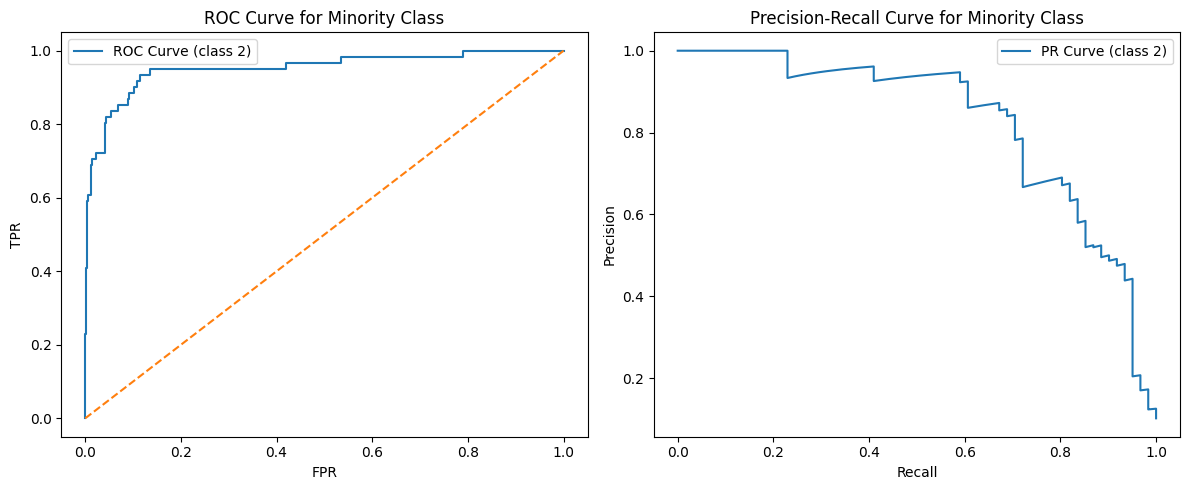

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
)

# Dataset
X, y = make_classification(
    n_samples=3000, n_features=50, n_informative=15, n_redundant=10,
    n_classes=3, weights=[0.6, 0.3, 0.1], flip_y=0.02, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=2000, multi_class='multinomial'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

# Evaluation
for name, clf in classifiers.items():
    if name in ["Logistic Regression", "SVM"]:  # scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        y_proba = clf.predict_proba(X_test_scaled)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_proba = clf.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    y_bin = label_binarize(y_test, classes=[0,1,2])
    roc_auc = roc_auc_score(y_bin, y_proba, average='macro', multi_class='ovr')
    pr_auc = average_precision_score(y_bin, y_proba, average='macro')

    print(f"\n{name}")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision (macro): {prec:.3f}")
    print(f"Recall (macro): {rec:.3f}")
    print(f"F1-score (macro): {f1:.3f}")
    print(f"ROC-AUC (macro): {roc_auc:.3f}")
    print(f"PR-AUC (macro): {pr_auc:.3f}")

# ROC & PR for minority class (class 2) with SVM
y_bin = label_binarize(y_test, classes=[0,1,2])
clf = SVC(kernel='rbf', probability=True)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
clf.fit(X_train_scaled, y_train)
y_proba = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_bin[:,2], y_proba[:,2])
prec, rec, _ = precision_recall_curve(y_bin[:,2], y_proba[:,2])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label='ROC Curve (class 2)')
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Minority Class')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rec, prec, label='PR Curve (class 2)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Minority Class')
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression
Accuracy: 0.790
Precision (macro): 0.701
Recall (macro): 0.599
F1-score (macro): 0.635
ROC-AUC (macro): 0.829
PR-AUC (macro): 0.673

Decision Tree
Accuracy: 0.765
Precision (macro): 0.650
Recall (macro): 0.611
F1-score (macro): 0.626
ROC-AUC (macro): 0.710
PR-AUC (macro): 0.526

SVM
Accuracy: 0.870
Precision (macro): 0.905
Recall (macro): 0.697
F1-score (macro): 0.761
ROC-AUC (macro): 0.923
PR-AUC (macro): 0.856


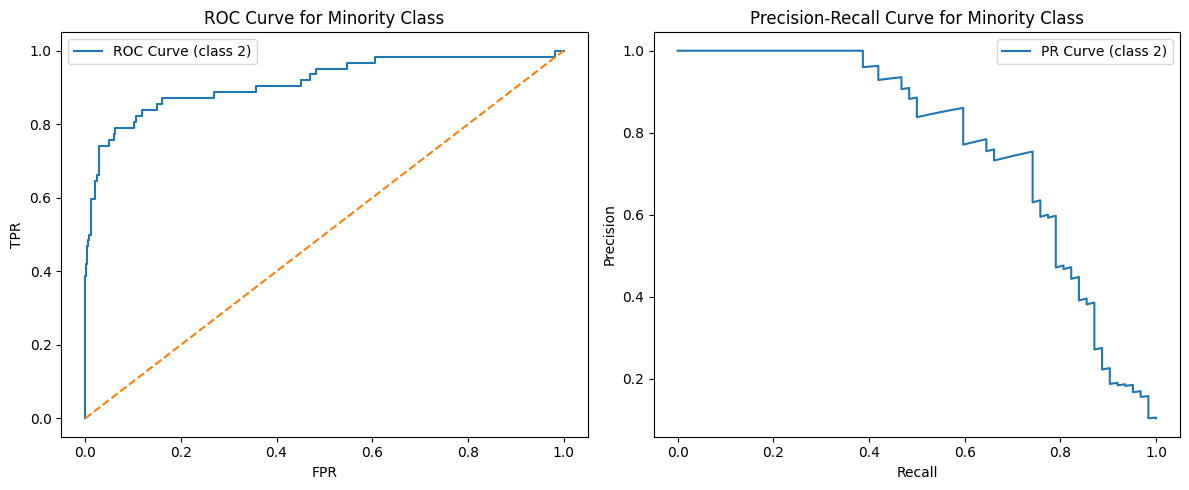

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
)

# Dataset
X, y = make_classification(
    n_samples=3000, n_features=50, n_informative=15, n_redundant=10,
    n_classes=3, weights=[0.7, 0.2, 0.1], flip_y=0.02, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=2000, multi_class='multinomial'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

# Evaluation
for name, clf in classifiers.items():
    if name in ["Logistic Regression", "SVM"]:  # scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        y_proba = clf.predict_proba(X_test_scaled)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_proba = clf.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    y_bin = label_binarize(y_test, classes=[0,1,2])
    roc_auc = roc_auc_score(y_bin, y_proba, average='macro', multi_class='ovr')
    pr_auc = average_precision_score(y_bin, y_proba, average='macro')

    print(f"\n{name}")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision (macro): {prec:.3f}")
    print(f"Recall (macro): {rec:.3f}")
    print(f"F1-score (macro): {f1:.3f}")
    print(f"ROC-AUC (macro): {roc_auc:.3f}")
    print(f"PR-AUC (macro): {pr_auc:.3f}")

# ROC & PR for minority class (class 2) with SVM
y_bin = label_binarize(y_test, classes=[0,1,2])
clf = SVC(kernel='rbf', probability=True)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
clf.fit(X_train_scaled, y_train)
y_proba = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_bin[:,2], y_proba[:,2])
prec, rec, _ = precision_recall_curve(y_bin[:,2], y_proba[:,2])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label='ROC Curve (class 2)')
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Minority Class')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rec, prec, label='PR Curve (class 2)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Minority Class')
plt.legend()
plt.tight_layout()
plt.show()


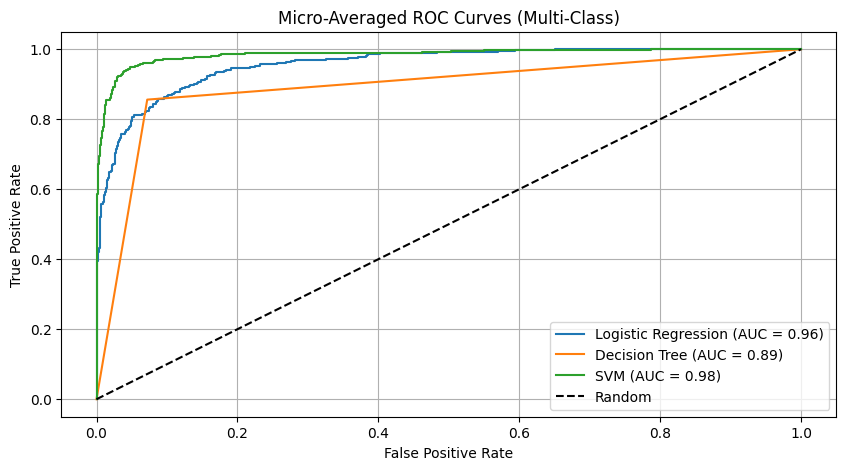

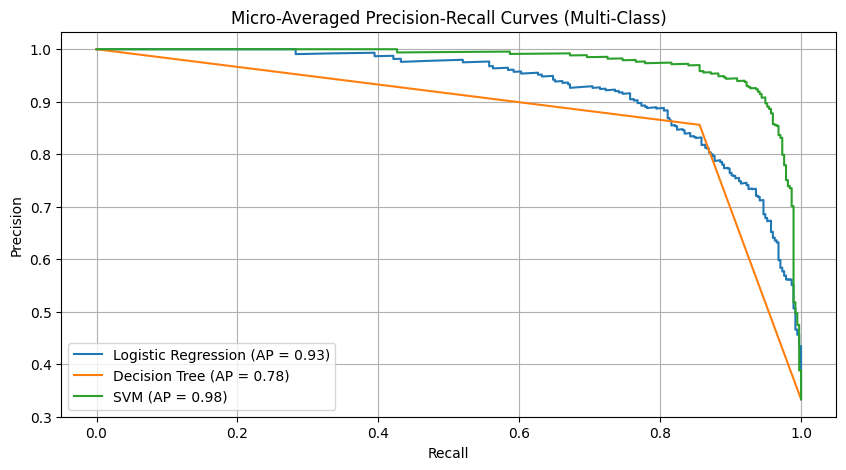

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.multiclass import OneVsRestClassifier

# Step 1: Generate imbalanced multi-class data
X, y = make_classification(
    n_samples=1500,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    n_classes=3,
    n_clusters_per_class=1,
    weights=[0.7, 0.2, 0.1],  # Imbalanced: class 0 > class 1 > class 2
    flip_y=0,
    random_state=42
)

# Binarize labels for ROC/PR
classes = np.array([0, 1, 2])
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

# Train/Test split
X_train, X_test, y_train, y_test, y_bin_train, y_bin_test = train_test_split(
    X, y, y_bin, stratify=y, random_state=42
)

# Define models
base_models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True)
}

# Store results
results = {}

# Step 2: Train and evaluate models (One-vs-Rest)
for name, model in base_models.items():
    clf = OneVsRestClassifier(model)
    clf.fit(X_train, y_bin_train)
    y_score = clf.predict_proba(X_test)

    # ROC & PR
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    precision = dict()
    recall = dict()
    pr_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        precision[i], recall[i], _ = precision_recall_curve(y_bin_test[:, i], y_score[:, i])
        pr_auc[i] = average_precision_score(y_bin_test[:, i], y_score[:, i])

    # Micro-average
    fpr["micro"], tpr["micro"], _ = roc_curve(y_bin_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    precision["micro"], recall["micro"], _ = precision_recall_curve(y_bin_test.ravel(), y_score.ravel())
    pr_auc["micro"] = average_precision_score(y_bin_test, y_score, average="micro")

    results[name] = {
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'pr_auc': pr_auc
    }

# Step 3: Plot micro-averaged ROC curves
plt.figure(figsize=(10, 5))
for name in results:
    plt.plot(results[name]['fpr']['micro'], results[name]['tpr']['micro'],
             label=f"{name} (AUC = {results[name]['roc_auc']['micro']:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.title("Micro-Averaged ROC Curves (Multi-Class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Plot micro-averaged PR curves
plt.figure(figsize=(10, 5))
for name in results:
    plt.plot(results[name]['recall']['micro'], results[name]['precision']['micro'],
             label=f"{name} (AP = {results[name]['pr_auc']['micro']:.2f})")
plt.title("Micro-Averaged Precision-Recall Curves (Multi-Class)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()
